In [94]:
import pandas as pd
import scipy.optimize as opt;

Df = pd.read_csv("../../membershipchainservice/Data/gentree-node_0-epoch9")
Df

,Name,Level,X,Y,cluster,bunch
0,node_0,0,273.951247,45.102534,map[node_15:true node_17:true node_19:true],map[node_1:true node_10:true node_11:true node...
1,node_1,0,440.346527,280.449161,map[node_0:true node_7:true node_8:true],map[node_10:true node_12:true node_9:true]
2,node_2,0,431.784812,29.036723,map[node_0:true],map[node_10:true node_13:true node_9:true]
3,node_3,0,39.294963,63.361512,map[node_0:true],map[node_10:true node_9:true]
4,node_4,0,352.297386,480.878201,map[node_0:true node_13:true node_14:true node...,map[node_10:true node_12:true node_13:true nod...
5,node_5,0,489.861387,154.926687,map[node_0:true node_17:true node_8:true],map[node_10:true node_12:true node_8:true node...
6,node_6,1,361.021221,435.833942,map[node_0:true node_4:true node_7:true node_8...,map[node_10:true node_9:true]
7,node_7,0,363.958328,347.926175,map[node_15:true node_16:true],map[node_1:true node_10:true node_12:true node...
8,node_8,0,173.655535,283.639112,map[node_5:true],map[node_1:true node_10:true node_12:true node...
9,node_9,2,445.052127,391.823010,map[node_0:true node_1:true node_10:true node_...,map[node_10:true]


In [95]:
cluster = Df["cluster"][1]
import re

regex = r"(node_[0-9]+)"
explode_list_lambda = lambda map_str : [m.group() for m in re.finditer(regex, map_str, re.MULTILINE)]
Df["cluster_list"] = Df["cluster"].apply(explode_list_lambda)
Df["bunch_list"] = Df["bunch"].apply(explode_list_lambda)
Df

,Name,Level,X,Y,cluster,bunch,cluster_list,bunch_list
0,node_0,0,273.951247,45.102534,map[node_15:true node_17:true node_19:true],map[node_1:true node_10:true node_11:true node...,"[node_15, node_17, node_19]","[node_1, node_10, node_11, node_15, node_17, n..."
1,node_1,0,440.346527,280.449161,map[node_0:true node_7:true node_8:true],map[node_10:true node_12:true node_9:true],"[node_0, node_7, node_8]","[node_10, node_12, node_9]"
2,node_2,0,431.784812,29.036723,map[node_0:true],map[node_10:true node_13:true node_9:true],[node_0],"[node_10, node_13, node_9]"
3,node_3,0,39.294963,63.361512,map[node_0:true],map[node_10:true node_9:true],[node_0],"[node_10, node_9]"
4,node_4,0,352.297386,480.878201,map[node_0:true node_13:true node_14:true node...,map[node_10:true node_12:true node_13:true nod...,"[node_0, node_13, node_14, node_15]","[node_10, node_12, node_13, node_6, node_9]"
5,node_5,0,489.861387,154.926687,map[node_0:true node_17:true node_8:true],map[node_10:true node_12:true node_8:true node...,"[node_0, node_17, node_8]","[node_10, node_12, node_8, node_9]"
6,node_6,1,361.021221,435.833942,map[node_0:true node_4:true node_7:true node_8...,map[node_10:true node_9:true],"[node_0, node_4, node_7, node_8]","[node_10, node_9]"
7,node_7,0,363.958328,347.926175,map[node_15:true node_16:true],map[node_1:true node_10:true node_12:true node...,"[node_15, node_16]","[node_1, node_10, node_12, node_6, node_9]"
8,node_8,0,173.655535,283.639112,map[node_5:true],map[node_1:true node_10:true node_12:true node...,[node_5],"[node_1, node_10, node_12, node_5, node_6, nod..."
9,node_9,2,445.052127,391.823010,map[node_0:true node_1:true node_10:true node_...,map[node_10:true],"[node_0, node_1, node_10, node_11, node_12, no...",[node_10]


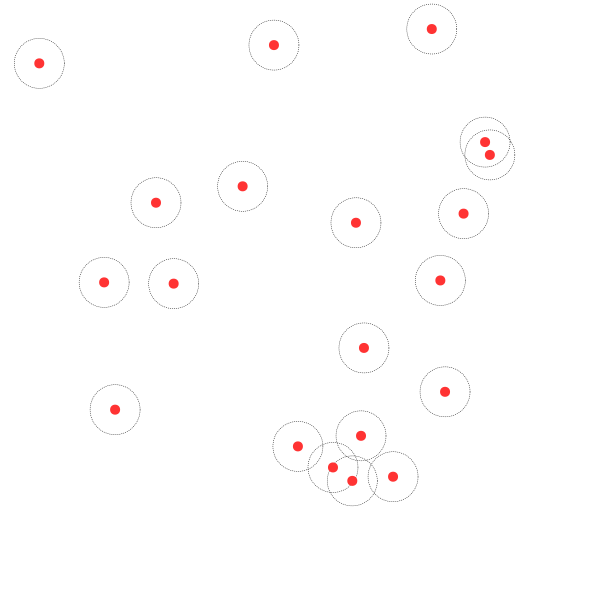

In [97]:
from io import BytesIO

import cairo
import IPython.display

svgio = BytesIO()

with cairo.SVGSurface(svgio, 600, 600) as surface:
    context = cairo.Context(surface)
    
    
    context.set_source_rgba(0,0,0,1)
    context.set_dash([1.0])
    context.set_line_width(0.5)
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.arc(X, Y, 25, 0, 2*np.pi)
        context.stroke()
        
    context.set_source_rgba(1, 0.2, 0.2, 1)
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        #context.move_to(X,Y)
        context.arc(X, Y, 5, 0, 2*np.pi)
        context.fill()
    
    
    
IPython.display.SVG(data=svgio.getvalue())